In [19]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
data = pd.read_csv('agaricus-lepiota.data.txt', header = None)

In [4]:
col = ["target","cap-shape",
       "cap-surface", "cap-color","bruises","odor","gill-attachment", 
       "gill-spacing", "gill-size","gill-color","stalk-shape",
       "stalk-root", "stalk-surface-above-ring","stalk-surface-below-ring"
       ,"stalk-color-above-ring","stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
       "spore-print-color", "population", "habitat"]

In [5]:
data.columns=col

In [6]:
tap =pd.get_dummies(data=data, columns=["cap-shape",
       "cap-surface", "cap-color","bruises","odor","gill-attachment", 
       "gill-spacing", "gill-size","gill-color","stalk-shape",
       "stalk-root", "stalk-surface-above-ring","stalk-surface-below-ring"
       ,"stalk-color-above-ring","stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
       "spore-print-color", "population", "habitat"])

In [50]:
data.shape


(8124, 23)

In [7]:
d_copy=data.copy()

In [8]:
df=data

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [10]:
df.describe()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [21]:
df=df.drop(["veil-type"],axis=1)
#because veil = 0 sur la df ci dessus 

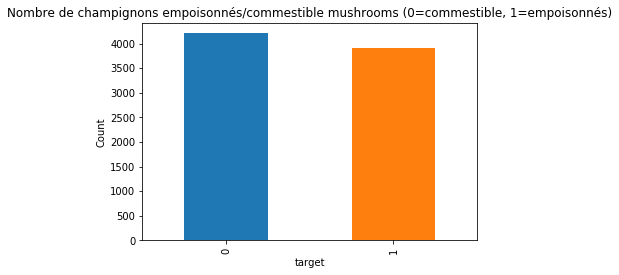

In [54]:
plt.figure()
pd.Series(df['target']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("target")
plt.title('Nombre de champignons empoisonnés/commestible mushrooms (0=commestible, 1=empoisonnés)');

On remarque que la repartition de champignon empoisonnés et comestibles est homogène.
C'est important pour avoir un modèle d'entrainement non biaisé. 

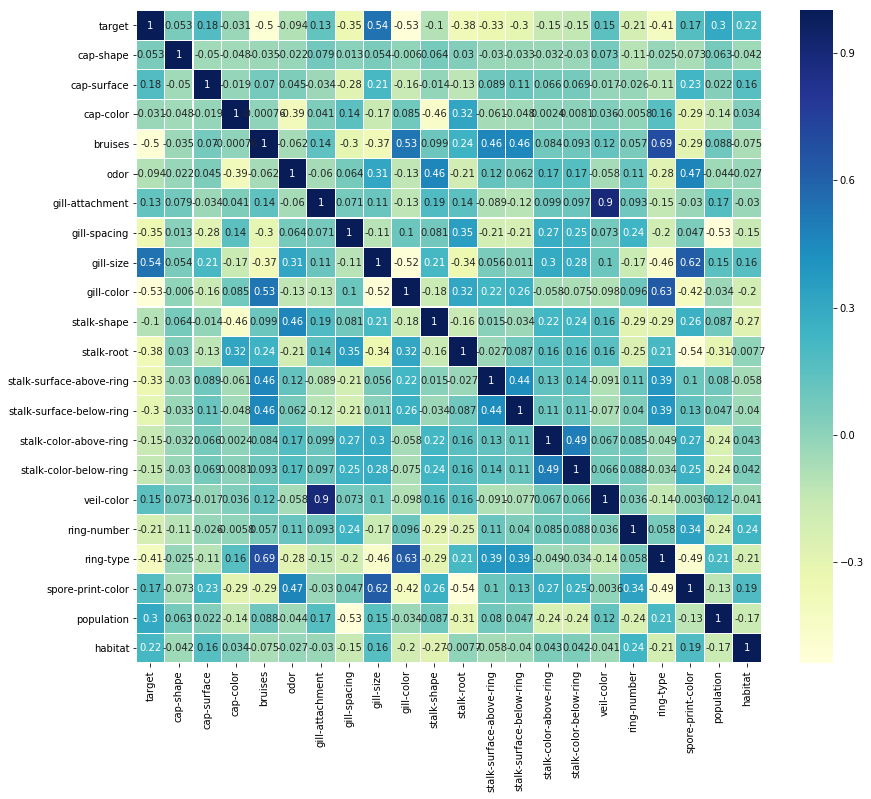

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
#Let's look at the correlation between the variables:

on remarque que gill color est la moins corélé avec "-0.53"

In [24]:
df[['target', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='target', ascending=False)

,gill-color,target
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


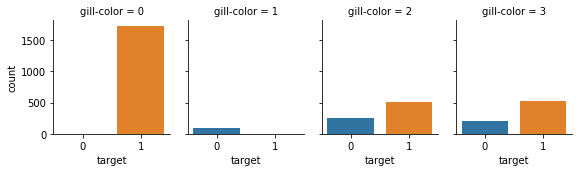

In [25]:
new_var=df[['target', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('target', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

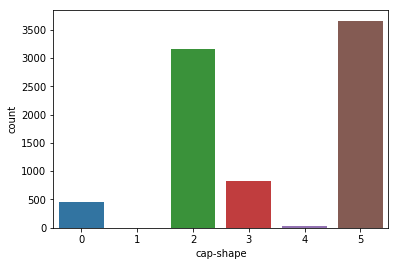

In [26]:
import seaborn as sns
title="repartition des formes de champignons"
sns.countplot(data['cap-shape'],label="Count")
plt.show()

3500 champignons sont de forme convex, suivit de près par les champignons plats.
ici 5 correspond à convex et 2 correspond à plat

In [27]:
pd.pivot_table(data,index=["cap-shape"],values=["target"],aggfunc='count')


,target
cap-shape,
0,452
1,4
2,3152
3,828
4,32
5,3656


In [13]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [70]:
tpp =pd.get_dummies(data=d_copy, columns=["cap-shape",
       "cap-surface", "cap-color","bruises","odor","gill-attachment", 
       "gill-spacing", "gill-size","gill-color","stalk-shape",
       "stalk-root", "stalk-surface-above-ring","stalk-surface-below-ring"
       ,"stalk-color-above-ring","stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
       "spore-print-color", "population", "habitat"])

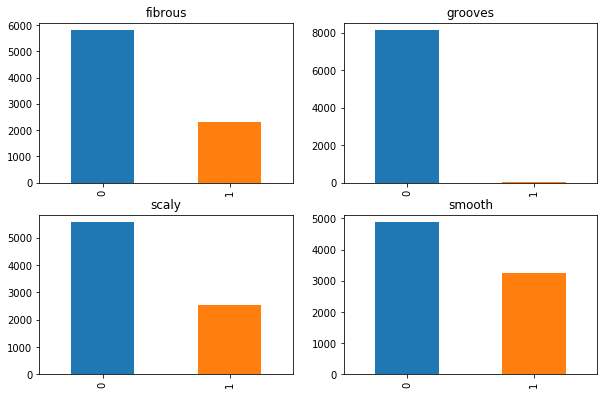

In [73]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
tpp['cap-surface_f'].value_counts().plot(kind='bar',title='fibrous')

plt.subplot2grid(fig_dims, (0, 1))
tpp['cap-surface_g'].value_counts().plot(kind='bar', 
                                     title='grooves')
plt.subplot2grid(fig_dims, (1, 0))    
tpp['cap-surface_s'].value_counts().plot(kind='bar', 
                                     title='scaly')

plt.subplot2grid(fig_dims, (1, 1))
tpp["cap-surface_y"].value_counts().plot(kind='bar', 
                                     title='smooth')

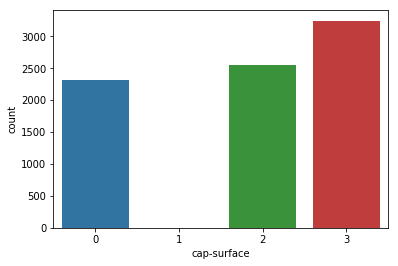

In [74]:
sns.countplot(data['cap-surface'],label="Count")



In [13]:
d_copy['stalk-root'].value_counts()


b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

on remarque que il y a 2480 "?"

In [14]:
d_copy = d_copy[d_copy['stalk-root'] != '?']

In [15]:
X = d_copy.loc[:, d_copy.columns != 'target']
X.head()
#different from target
y = d_copy['target'].to_frame()

In [16]:
y['target'].value_counts()

e    3488
p    2156
Name: target, dtype: int64

In [17]:
X_enc = pd.get_dummies(X)
X_enc.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


ON DOIT NORMALISER LA DATA

In [20]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_enc)
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())
X_train, X_test, y_train, y_test = train_test_split(
    X_std,
    y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42    
)

In [55]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_test, y_pred)

1.0

In [62]:
metrics.f1_score(y_test, y_pred)

1.0

In [69]:
#Cela permer de séparer notre jeu de donnée en training/ testing set pour ne pas biaiser notre model.
#Un grid search est également effectué sur chacun des 10 splits pour trouver
#les meilleurs hyper paramètres ( 10 test par split)

#ATTENTION long car équivaut à run 1000 models 


param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=X_std,
    y=y_enc,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)


/Users/victoirelinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/victoirelinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/victoirelinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/victoirelinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/victoirelinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops

In [64]:
scores

array([1.        , 0.99767442, 1.        , 1.        , 0.99767442,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [24]:
scores.mean()

0.9995348837209302

In [68]:
grid_search.fit(X_std, y_enc)
grid_search.best_params_
# grid search pour trouver les meilleurs hyper parametres.

{'C': 0.1}

In [26]:
final_clf = LogisticRegression(C=0.1)
final_clf.fit(X_std, y_enc);

In [27]:
#Now let's report the five features that are most strongly correlated with target, either positively or negatively, as determined by the magnitude of the learned parameters.
feature_ranks = pd.DataFrame(final_clf.coef_, index=['parameter value'])
feature_ranks.columns = X_enc.columns
feature_ranks.sort_values('parameter value', axis=1, ascending=False).T.head()

,parameter value
odor_p,1.078392
spore-print-color_h,0.924890
odor_f,0.924890
odor_c,0.880472
spore-print-color_r,0.577942


In [67]:
feature_ranks.sort_values('parameter value', axis=1, ascending=True).T.head()


,parameter value
odor_n,-1.043962
odor_l,-0.553868
odor_a,-0.553868
stalk-root_c,-0.481090
spore-print-color_n,-0.448844


On remarque que l’odeur du champignon est un facteur prédominant pour déterminer si un champignon est comestible.

# naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [34]:
y_pred_GNB=clf_GNB.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, y_pred_GNB)

Text(0.5,15,'Predicted label')

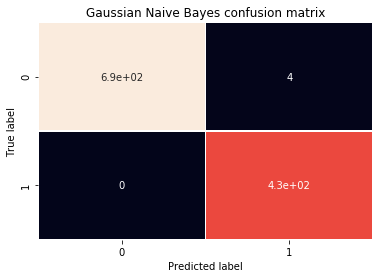

In [38]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [65]:
from sklearn.metrics import classification_report
print("Gaussian Naive Bayes report \n", classification_report(y_test, y_pred_GNB))

Gaussian Naive Bayes report 
              precision    recall  f1-score   support

          0       1.00      0.99      1.00       698
          1       0.99      1.00      1.00       431

avg / total       1.00      1.00      1.00      1129



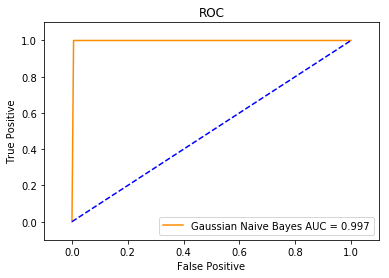

In [66]:
def roc_curve_acc(y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive')
    plt.xlabel('False Positive')

roc_curve_acc(y_test, y_pred_GNB, "Gaussian Naive Bayes")